# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
%matplotlib inline
from random import randint
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold#For splitting
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import fbeta_score, make_scorer


import warnings
warnings.filterwarnings("ignore")



## Load the data

In [2]:
df = pd.read_csv("real_estate_price_size.csv")
df.head(10)

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


In [4]:
df.shape

(100, 2)

In [5]:
df.size

200

## Create the regression

### Declare the dependent and the independent variables

In [6]:
X = df['size']
y = df['price']

### Explore the data

In [7]:
len(df.columns)

2

In [8]:
df.columns

Index(['price', 'size'], dtype='object')

In [9]:
df.dtypes

price    float64
size     float64
dtype: object

In [10]:
df.isna().sum()

price    0
size     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [12]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [13]:
df.corr()

,price,size
price,1.000000,0.862983
size,0.862983,1.000000


In [14]:
df.skew(axis=1, skipna=True)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Length: 100, dtype: float64

In [15]:
df.skew(axis=0, skipna=True)

price    0.631722
size     1.041943
dtype: float64

In [16]:
price_scaler = StandardScaler()
size_scaler = StandardScaler()
price_scale = price_scaler.fit(df[['price']])
size_scale = size_scaler.fit(df[['size']])
df.loc[:, ['price']] = price_scale.transform(df[['price']])
df.loc[:, ['size']] = size_scale.transform(df[['size']])

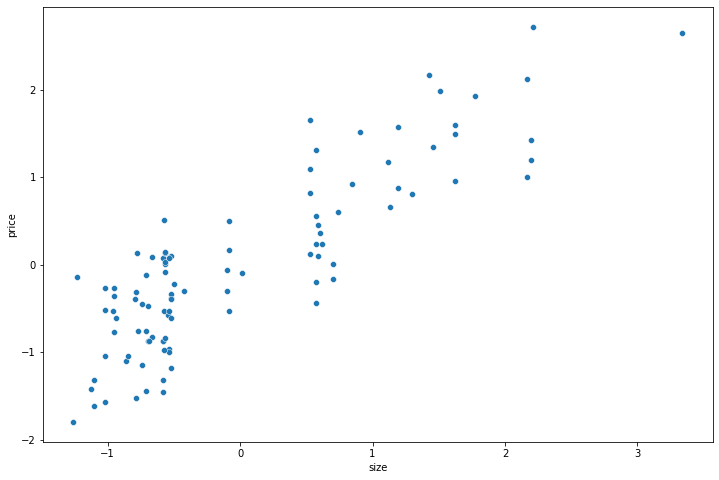

In [17]:
plt.figure(figsize= (12,8))
sns.scatterplot( x = 'size', y = 'price', data = df)
plt.show()

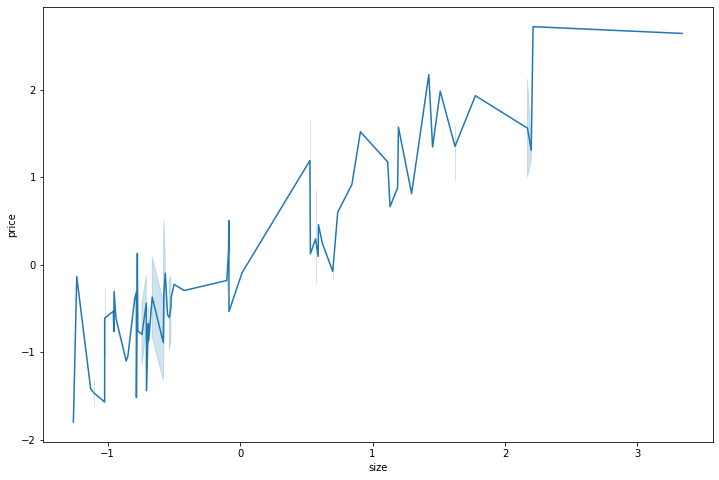

In [18]:
plt.figure(figsize= (12,8))
sns.lineplot( x = 'size', y = 'price', data = df)
plt.show()

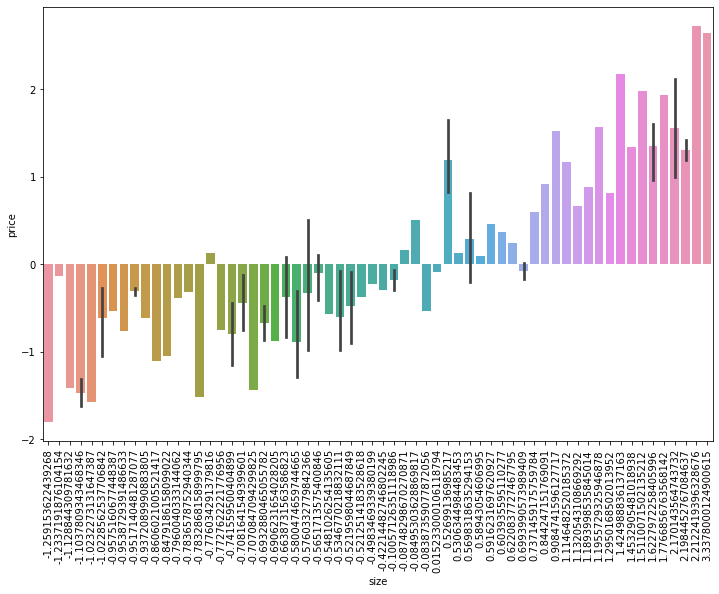

In [19]:
plt.figure(figsize= (12,8))
sns.barplot( x = 'size', y = 'price', data = df)
plt.xticks(rotation=90)
plt.show()

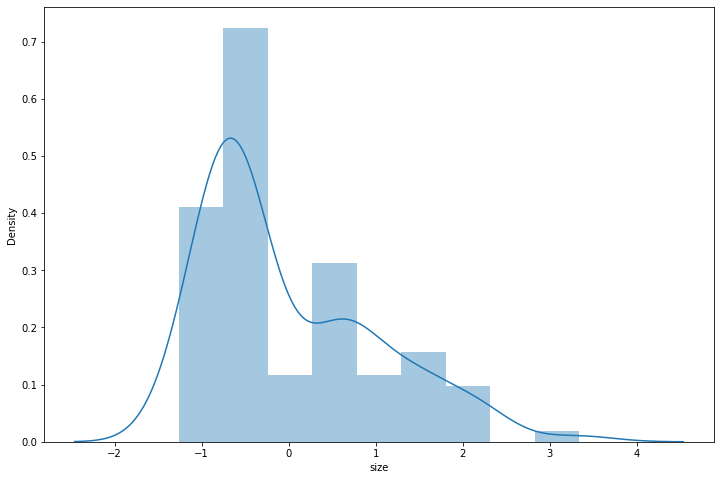

In [20]:
plt.figure(figsize= (12,8))
sns.distplot(df['size'])
plt.show()

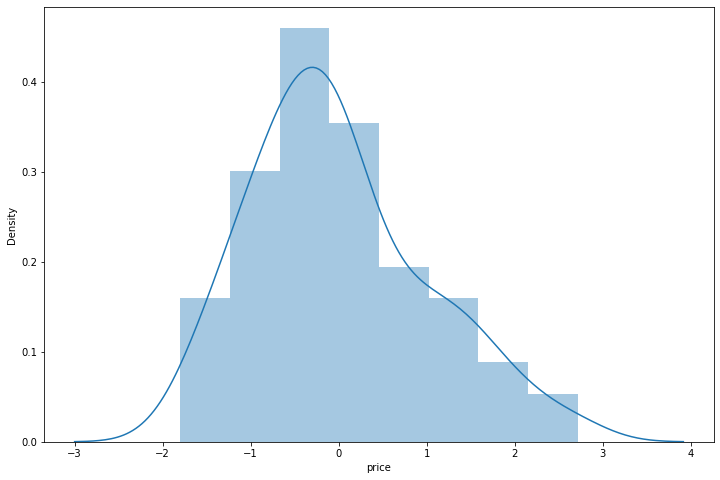

In [21]:
plt.figure(figsize= (12,8))
sns.distplot(df['price'])
plt.show()

In [22]:
df['price'].skew()

0.6317217678605828

In [23]:
df['size'].skew()

1.0419430663278875

In [24]:
X = df.drop(['price'], axis=1)
y = df.price
print(X.columns, X.shape)

Index(['size'], dtype='object') (100, 1)


In [25]:
df

,price,size
0,-0.756211,-0.708164
1,-0.830986,-0.663873
2,-0.139086,-1.233719
3,1.421319,2.198445
4,2.170269,1.424989
...,...,...
95,-0.519518,-1.022856
96,0.237827,0.622084
97,1.191489,2.198445
98,-0.875808,-0.690623


### Regression itself

Coefficients: 
 [0.84677874]
Residual sum of squares: 0.28
Variance score: 0.69
Intercept: 
 0.03988124295814497
R Squared Score: 
 0.7523527347795704


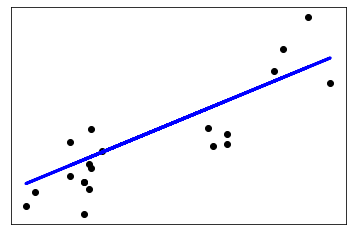

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients (slope)
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
# The intercept
print('Intercept: \n', regr.intercept_)
 #R Squared Score
print('R Squared Score: \n', regr.score(X_train, y_train))


y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(np.array(X_test), y_pred, color="blue", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

### Plot the regression line on the initial scatter

<Figure size 864x576 with 0 Axes>

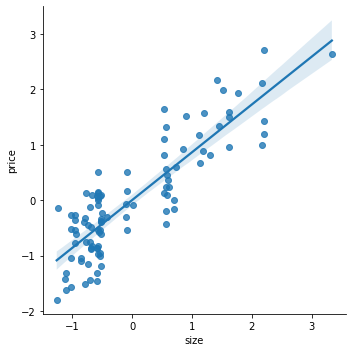

In [27]:
plt.figure(figsize= (12,8))
sns.lmplot( x = 'size', y = 'price', data = df)
plt.show()

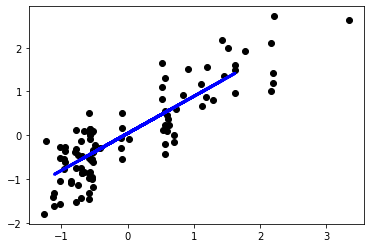

In [28]:
plt.scatter(X, y, color="black")
plt.plot(np.array(X_test), y_pred, color="blue", linewidth=3)

In [29]:
y_pred

array([-0.55977711, -0.31758202,  0.52240275, -0.40210322,  0.6321175 ,
       -0.40210322,  1.05226699, -0.45129062,  0.6321175 , -0.55977711,
       -0.45129062,  0.48921126, -0.82625169, -0.89477699, -0.41287189,
        1.2465315 ,  0.98374169,  1.41403144, -0.41287189, -0.45129062])

In [30]:
y_pred =  pd.DataFrame(y_pred)
y_pred = price_scale.inverse_transform(y_pred)
y_pred

array([[249373.87763466],
       [267941.88526147],
       [332339.73881515],
       [261462.02506949],
       [340751.07473856],
       [261462.02506949],
       [372962.04586519],
       [257691.04864145],
       [340751.07473856],
       [249373.87763466],
       [257691.04864145],
       [329795.09618484],
       [228944.47049342],
       [223690.94409919],
       [260636.4396378 ],
       [387855.43186236],
       [367708.51947096],
       [400696.89863009],
       [260636.4396378 ],
       [257691.04864145]])

In [31]:
profile = ProfileReport(df, title="Creditcard Fraud Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
profile.to_file(output_file="Pearse Jim Simple Linear Regression Assignment.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]